In [1]:
using PyPlot, DynamicalSystems

In [2]:
f(x, a, b) = exp(-a*x^2) + b

f (generic function with 1 method)

In [3]:
a = 1

1

In [4]:
N = 1000
t = -1:0.2:1
X = zeros(length(t), N)
X[:, 1] = ones(length(t))
i = 1
for b in t
    for j in 2:N
        X[i, j] = f(X[i, j-1], a, b)
    end
    i += 1
end

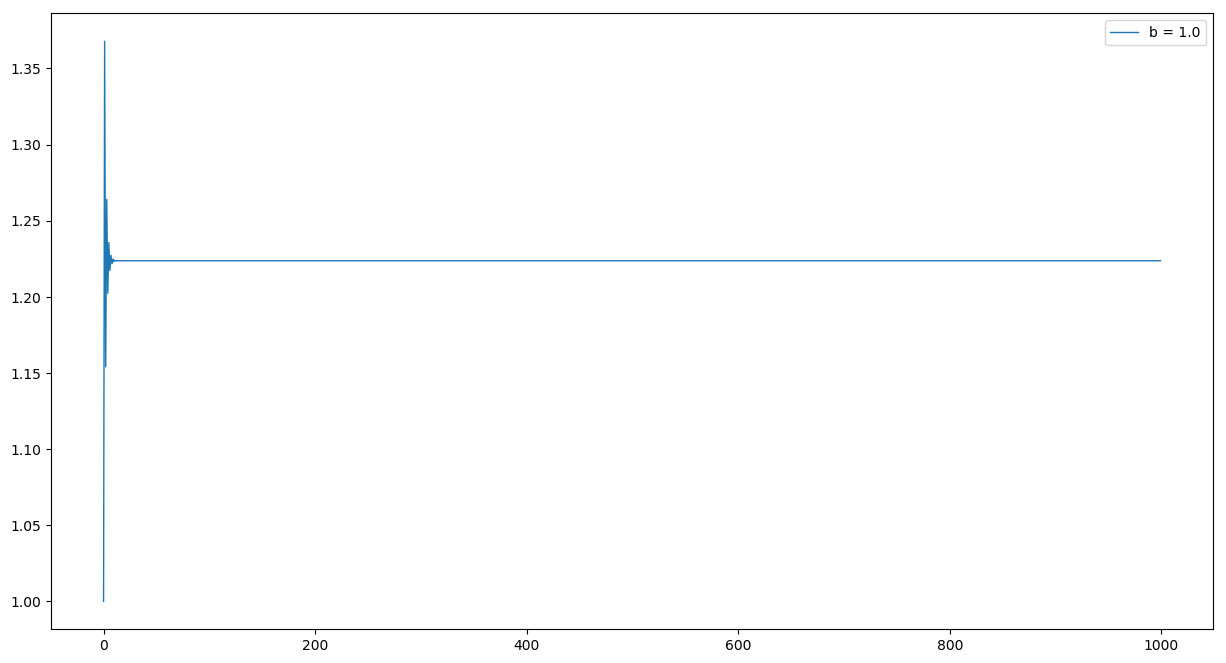

PyObject <matplotlib.legend.Legend object at 0x7fcefb87e438>

In [5]:
figure(figsize=(15,8))
for i in [11]   
    plot(X[i,:], label="b = $(t[i])", linewidth=1)
end
legend()

In [6]:
X[100]

0.0

### Using DynamicalSystems.jl

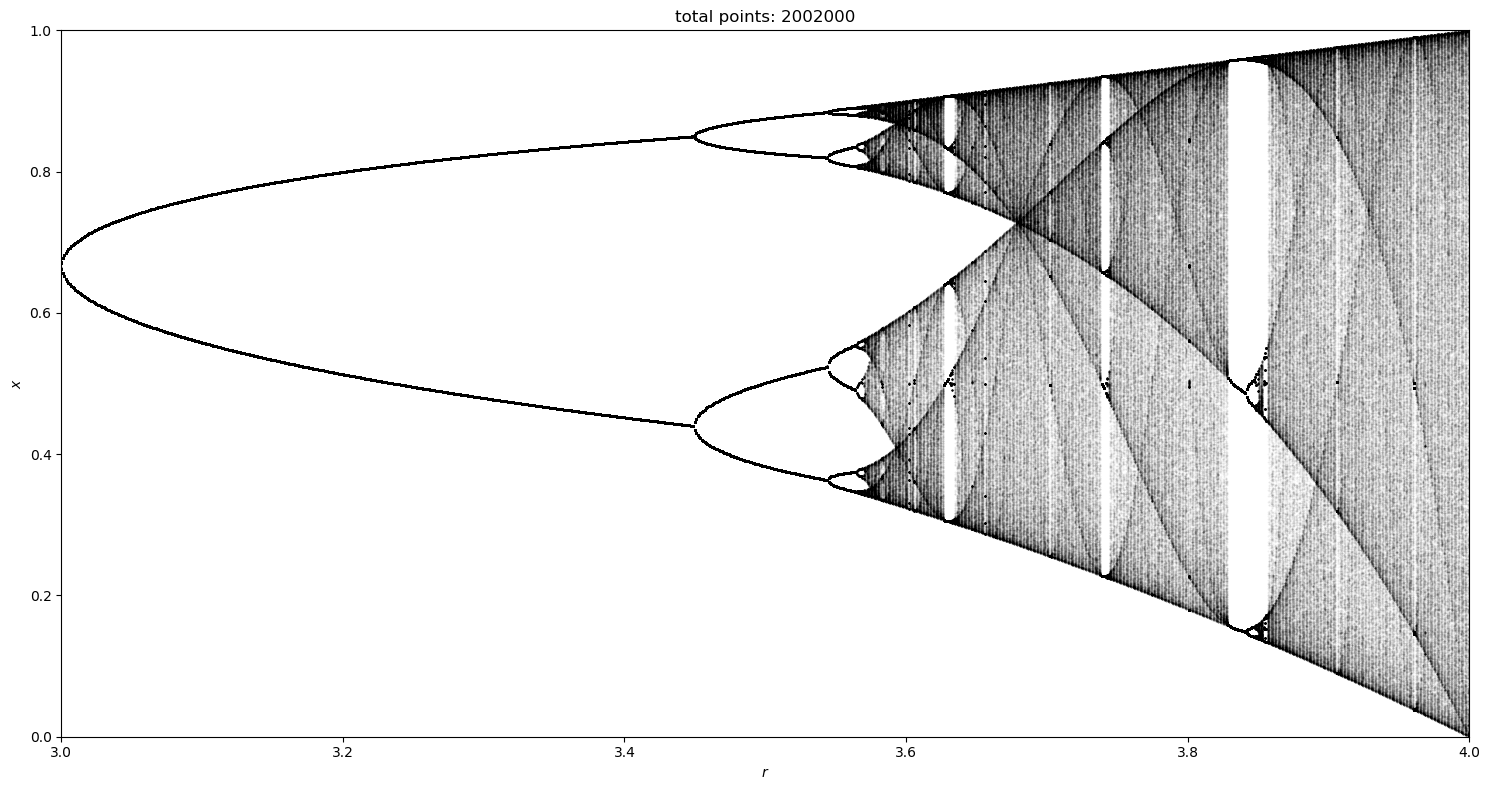

In [7]:
ds = Systems.logistic()
i = 1
pvalues = 3:0.001:4
ics = [rand() for m in 1:10]
n = 2000
Ttr = 2000
p_index = 1
output = orbitdiagram(ds, i, p_index, pvalues; n = n, Ttr = Ttr)

L = length(pvalues)
x = Vector{Float64}(undef, n*L)
y = copy(x)
for j in 1:L
    x[(1 + (j-1)*n):j*n] .= pvalues[j]
    y[(1 + (j-1)*n):j*n] .= output[j]
end

figure(figsize=(15,8))
PyPlot.title("total points: $(L*n)")
plot(x, y, ls = "None", ms = 0.5, color = "black", marker = "o", alpha = 0.05)
xlim(pvalues[1], pvalues[end]); ylim(0,1)
xlabel("\$r\$"); ylabel("\$x\$")
tight_layout()


In [16]:
function f(dx, x, p, n)
    dx[1] = exp(-p[1]*x[1]^2) + p[2]
    return dx
end
ds = DiscreteDynamicalSystem(f, [0.0], [7.0, 1.0])

1-dimensional discrete dynamical system
 state:       [0.0]
 e.o.m.:      f
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [7.0, 1.0]

In [17]:
i = 1
pvalues = -1:0.001:1
# ics = [rand() for m in 1:10]
n = 2000
Ttr = 2000
p_index = 2
output = orbitdiagram(ds, i, p_index, pvalues; n = n, Ttr = Ttr)

L = length(pvalues)
x = Vector{Float64}(undef, n*L)
y = copy(x)
for j in 1:L
    x[(1 + (j-1)*n):j*n] .= pvalues[j]
    y[(1 + (j-1)*n):j*n] .= output[j]
end

In [47]:
output[1000]

2000-element Array{Float64,1}:
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 ⋮                 
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039
 0.5879440662834041
 0.5879440662834039

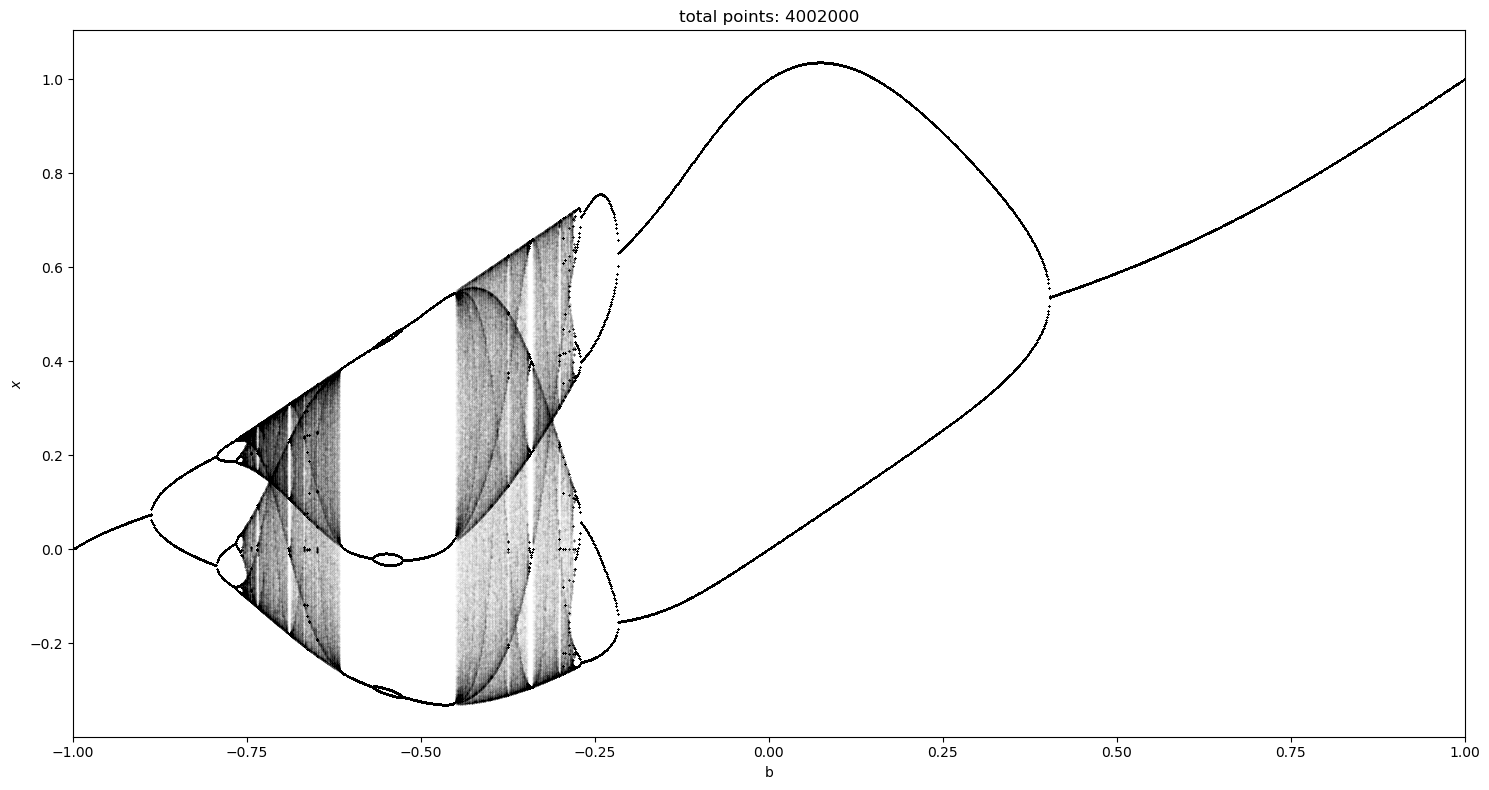

In [18]:
figure(figsize = (15,8))
PyPlot.title("total points: $(L*n)")
plot(x, y, ls = "None", ms = 0.2, color = "black", marker = "o", alpha = 0.05)
xlim(pvalues[1], pvalues[end]); 
xlabel("b"); ylabel("\$x\$")
tight_layout()
# savefig("q3.pdf")
savefig("q3.png")

In [6]:
F(x, a, b) = exp(-a*x^2) + b
df(x) = -2*a*x*exp(-a*x^2)

df (generic function with 1 method)

In [41]:
a = 7
N = 100000
t = -1:0.01:1
X = zeros(length(t), N)
X[:, 1] = zeros(length(t)).+sqrt(2)/10
i = 1
for b in t
    for j in 2:N
        X[i, j] = f(X[i, j-1], a, b)
    end
    i += 1
end

In [42]:
L = sum(log.(abs.(df.(X))), dims=2)/N

201×1 Array{Float64,2}:
 -Inf                   
   -2.030257970127669   
   -1.3923684493491995  
   -1.0357284169096448  
   -0.7920518130131617  
   -0.6091431368639654  
   -0.4639914806388088  
   -0.34451813231913236 
   -0.24356874263071604 
   -0.15658508781575595 
   -0.08049063253071585 
   -0.013126471450131046
   -0.10808671574745071 
    ⋮                   
   -3.0646879296951397  
   -3.1744968615684     
   -3.2862009843801365  
   -3.3997749014851975  
   -3.51519339129015    
   -3.6324316198782762  
   -3.751465323644721   
   -3.8722709624463563  
   -3.994825844050644   
   -4.11910822154873    
   -4.245097366002525   
   -4.3727736161518385  

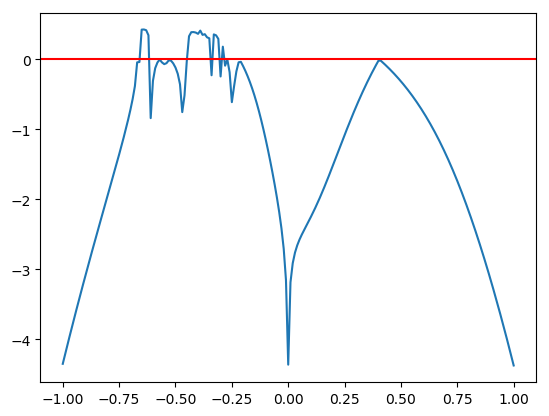

PyObject <matplotlib.lines.Line2D object at 0x7f01d18db438>

In [40]:
plot(t, L)
axhline(0, color = "r")

In [53]:
lyapunov(ds, 1000)

-2.754593329932896

In [9]:
function g(dx, x, p, n)
    a, b, c, d = p
    dx[1] = x[1]^2 - x[2]^2 + a*x[1] + b*x[2]
    dx[2] = 2*x[1]*x[2] + c*x[1] + d*x[2]
    return dx
end


g (generic function with 1 method)

In [10]:
p = [0.9, -0.6013, 2, 0.5]
ds = DiscreteDynamicalSystem(g, [0.0, 0.0], p)

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      g
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [0.9, -0.6013, 2.0, 0.5]